# HDI Category Prediction Using Historical Development Indicators

In [64]:
import pandas as pd
df = pd.read_csv("HDI.csv")

In [65]:
df.head()

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [66]:
df.describe()

,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
count,191.000000,152.000000,152.000000,152.000000,152.000000,152.000000,163.000000,163.000000,163.000000,163.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,95.811518,0.595112,0.597862,0.600493,0.604474,0.609329,0.613908,0.619663,0.624975,0.630417,...,15.249784,15.385926,15.347629,15.352632,15.342119,15.491780,14.597416,14.776332,14.775408,14.774396
std,55.307333,0.161918,0.161921,0.162193,0.163122,0.163818,0.162789,0.163461,0.164299,0.165177,...,14.134572,14.555342,14.363092,14.680340,15.015809,15.333709,13.581871,14.266308,14.266504,14.266706
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.430000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.477750,0.477000,0.475250,0.474250,0.476500,0.480500,0.488500,0.490000,0.492000,...,4.597500,4.525000,4.452375,4.457500,4.517500,4.575000,4.612500,4.732500,4.732500,4.732500
50%,96.000000,0.621500,0.623500,0.622000,0.624000,0.623500,0.642000,0.650000,0.651000,0.657000,...,10.907725,11.272314,10.745000,10.260000,10.590000,10.895000,11.215000,11.030000,11.030000,11.030000
75%,143.500000,0.725500,0.727000,0.723750,0.724250,0.733750,0.737000,0.743000,0.752500,0.759000,...,20.345000,20.397500,20.227500,20.187500,19.350000,19.757500,18.432500,17.932500,17.932500,17.932500
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.560000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 1008 entries, iso3 to mf_2021
dtypes: float64(1004), object(4)
memory usage: 1.6+ MB


In [68]:
df.isnull().sum()


iso3              0
country           0
hdicode          15
region           55
hdi_rank_2021    15
                 ..
mf_2017          38
mf_2018          38
mf_2019          38
mf_2020          38
mf_2021          38
Length: 1008, dtype: int64

In [69]:
nums_cols = df.select_dtypes(include=["number"]).columns
obj_cols = df.select_dtypes(include=["object"]).columns

In [70]:
from sklearn.impute import SimpleImputer

In [71]:
nums_imputer = SimpleImputer(strategy="median")
df[nums_cols] = nums_imputer.fit_transform(df[nums_cols])

In [72]:
obj_imputer = SimpleImputer(strategy="most_frequent")
df[obj_cols] = obj_imputer.fit_transform(df[obj_cols])

In [73]:
df.head()

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.2730,0.2790,0.287,0.297,0.2920,...,1.860000,1.880000,1.660,1.62,1.66,1.410,1.320,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,0.6215,0.6235,0.622,0.624,0.6235,...,4.090000,4.530000,3.970,3.59,2.79,2.640,2.280,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.6470,0.6290,0.614,0.617,0.6240,...,12.440000,11.490000,13.140,12.61,14.39,14.460,12.850,12.96,12.96,12.96
3,AND,Andorra,Very High,SSA,40.0,0.6215,0.6235,0.622,0.624,0.6235,...,10.907725,11.272314,10.745,10.26,10.59,10.895,11.215,11.03,11.03,11.03
4,ARE,United Arab Emirates,Very High,AS,26.0,0.7280,0.7390,0.742,0.748,0.7550,...,49.560000,49.680000,55.490,59.76,64.95,75.610,65.970,68.95,68.95,68.95


In [74]:
X = df.drop(columns=[     # these values may confuse the model or cause data leakage..

    "iso3", "country", "region",
    "hdicode",          # target
    "hdi_2021",         # directly defines hdicode
    "hdi_rank_2021"     # derived from hdi
])
y = df["hdicode"]


In [75]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(
    X,y , test_size=0.2,random_state=42
)

In [76]:
#Standardization and normalization is not required in random forest so,we can't perform..
from sklearn.ensemble import RandomForestClassifier


In [77]:
rf = RandomForestClassifier(
    n_estimators = 500,
    random_state = 42
)

In [78]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [79]:
y_pred = rf.predict(X_test)
y_pred

array(['Medium', 'Very High', 'High', 'Very High', 'Very High', 'High',
       'Low', 'Very High', 'Very High', 'Very High', 'Very High',
       'Very High', 'Low', 'Very High', 'Medium', 'High', 'Very High',
       'Medium', 'High', 'Medium', 'Medium', 'Very High', 'High',
       'Very High', 'Very High', 'Very High', 'Medium', 'Very High',
       'High', 'Very High', 'Medium', 'Very High', 'Medium', 'Low',
       'Medium', 'High', 'Very High', 'Low', 'Low', 'Very High',
       'Very High', 'Low'], dtype=object)

In [80]:
y_test.head()

15        Medium
9      Very High
201    Very High
82     Very High
68     Very High
Name: hdicode, dtype: object

In [81]:
from sklearn.metrics import accuracy_score,classification_report
accu = accuracy_score(y_test,y_pred)
accu

0.9047619047619048

In [82]:
cr = classification_report(y_test,y_pred)
print("classification report\n",cr)

classification report
               precision    recall  f1-score   support

        High       0.86      0.67      0.75         9
         Low       1.00      1.00      1.00         6
      Medium       0.89      1.00      0.94         8
   Very High       0.90      0.95      0.92        19

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [83]:
from sklearn.metrics import confusion_matrix # we make heatmap for confusion matrixx
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
cm = confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'actual')

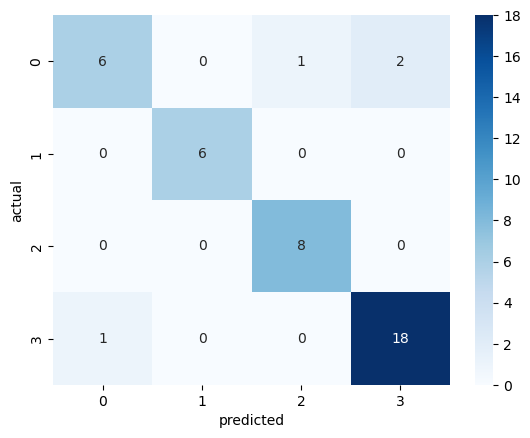

In [85]:
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")

In [86]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance.head(10))


hdi_2019      0.030037
hdi_2018      0.022132
hdi_2020      0.021148
hdi_2013      0.019059
hdi_2015      0.019039
hdi_2017      0.015281
hdi_f_2021    0.013983
hdi_2012      0.013387
hdi_m_2021    0.013054
hdi_2016      0.012467
dtype: float64
